In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import cosine
from scipy.stats import skew

In [14]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
data.shape

(5110, 12)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [39]:
numeric_cols = [
    'age',
    'hypertension',
    'heart_disease',
    'avg_glucose_level',
    'bmi',
    'stroke'
]
plot_cols = [
    'age',
    'hypertension',
    'bmi',
]

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [26]:
summary = data[numeric_cols].describe()
summary.loc['median'] = data[numeric_cols].median()
summary

In [28]:
quartiles = data[numeric_cols].quantile([0.25, 0.5, 0.75])
Q3=quartiles.loc[0.75]
Q1=quartiles.loc[0.25]
iqr = quartiles.loc[0.75] - quartiles.loc[0.25]
iqr

age                  36.000
hypertension          0.000
heart_disease         0.000
avg_glucose_level    36.845
bmi                   9.600
stroke                0.000
dtype: float64

In [31]:
outliers = pd.DataFrame()

for col in numeric_cols:
    lower_bound = Q1[col] - 1.5 * iqr[col]
    upper_bound = Q3[col] + 1.5 * iqr[col]
    mask = (data[col] < lower_bound) | (data[col] > upper_bound)
    outliers_in_col = data.loc[mask, col]
    
    outliers[col] = mask  
    
data[outliers.any(axis=1)].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


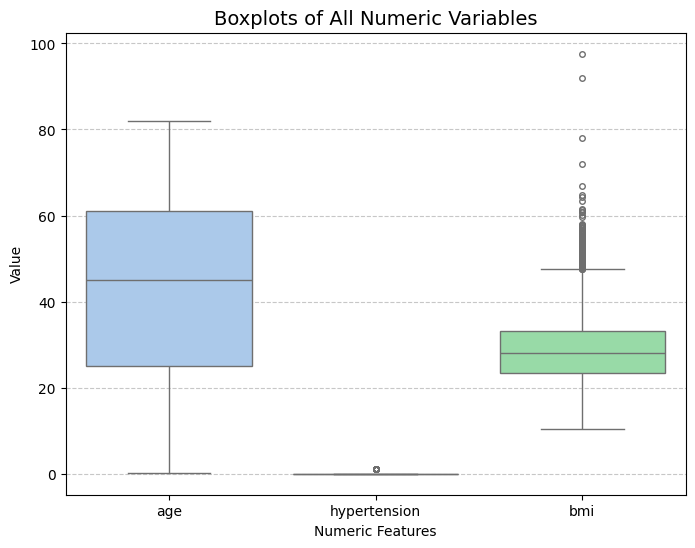

In [33]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=data[plot_cols], palette="pastel", fliersize=4)

plt.title("Boxplots of All Numeric Variables", fontsize=14)
plt.xlabel("Numeric Features")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

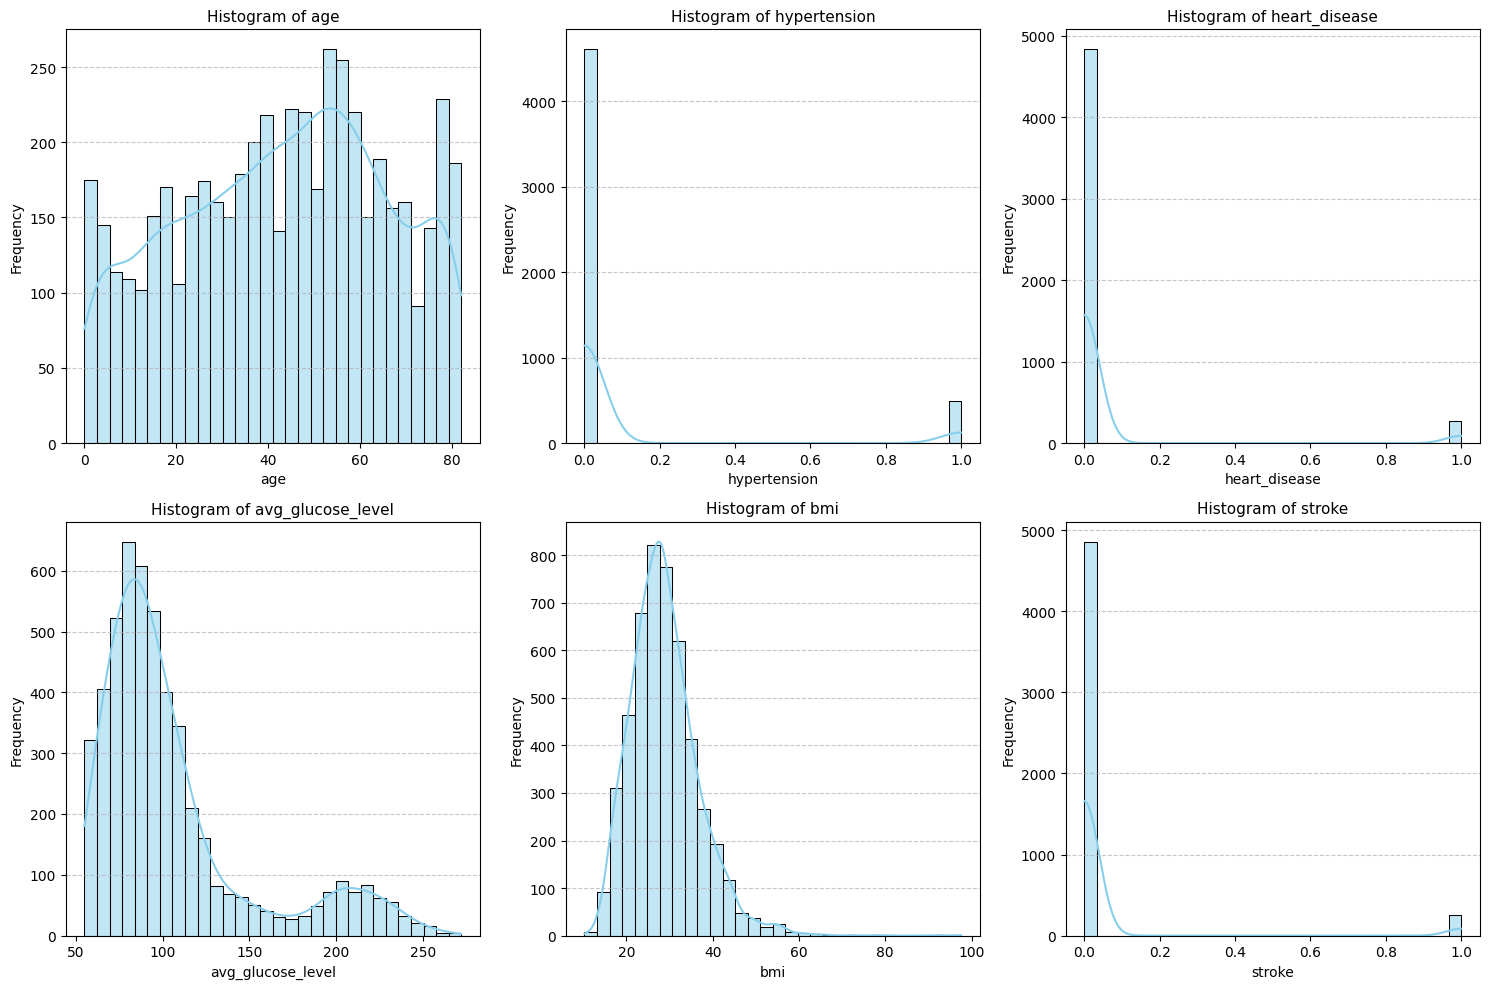

In [34]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(data[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


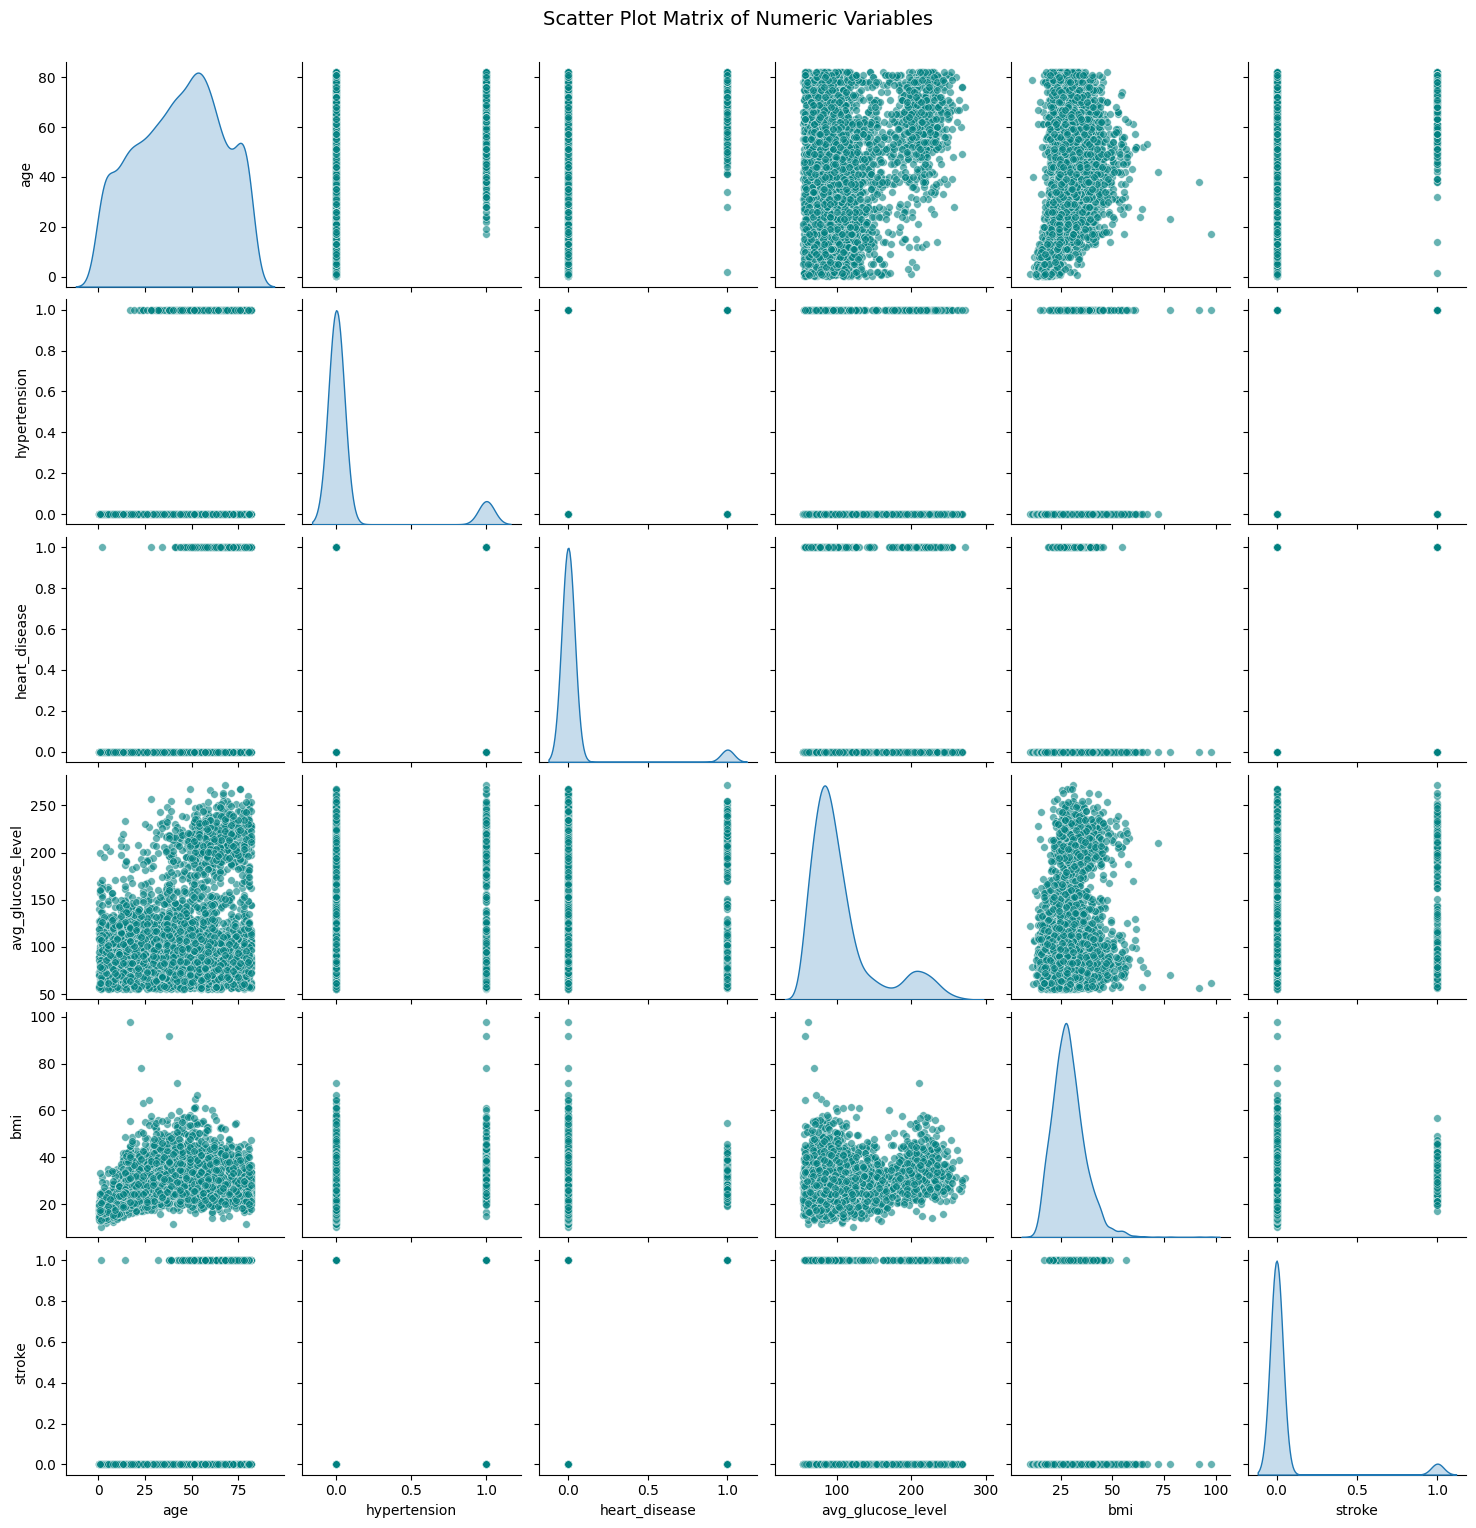

In [35]:
sns.pairplot(data[numeric_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30, 'color': 'teal'})

plt.suptitle("Scatter Plot Matrix of Numeric Variables", y=1.02, fontsize=14)
plt.show()


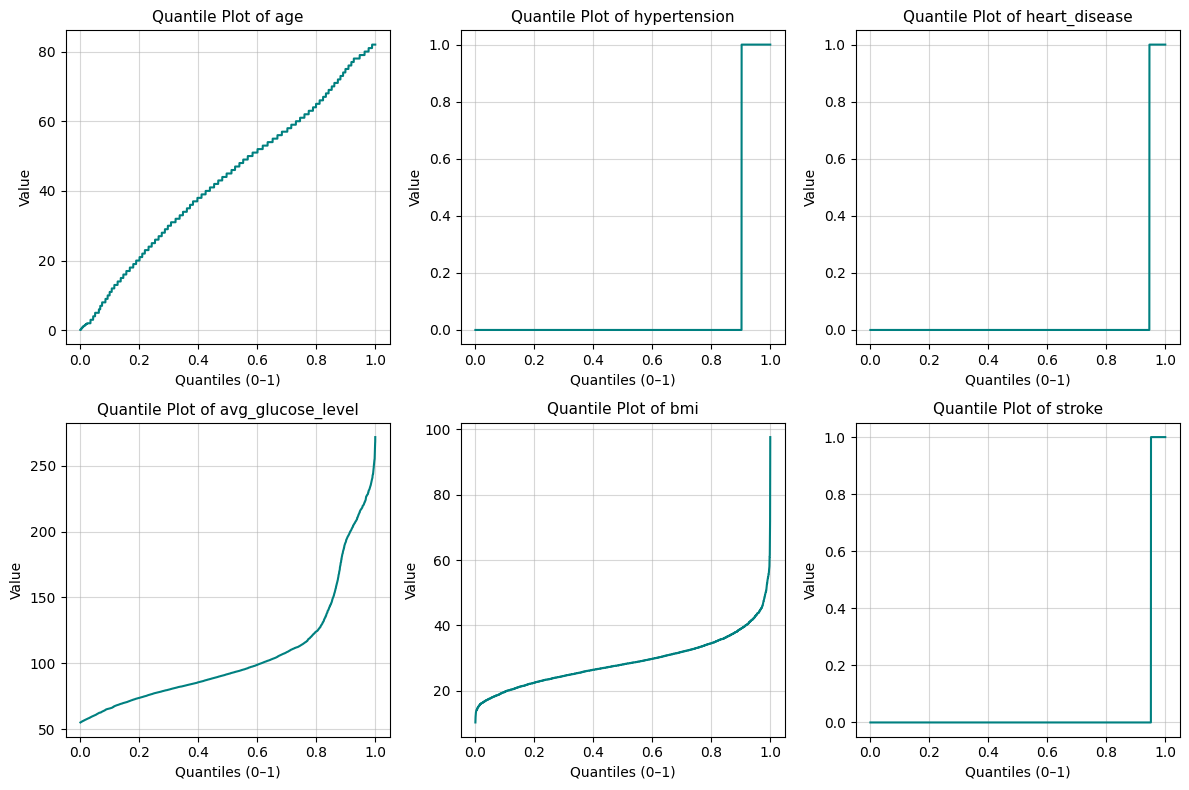

In [36]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    
    sorted_vals = np.sort(data[col].dropna())
    quantiles = np.linspace(0, 1, len(sorted_vals))
    
    plt.plot(quantiles, sorted_vals, color='teal')
    plt.title(f'Quantile Plot of {col}', fontsize=11)
    plt.xlabel('Quantiles (0–1)')
    plt.ylabel('Value')
    plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()


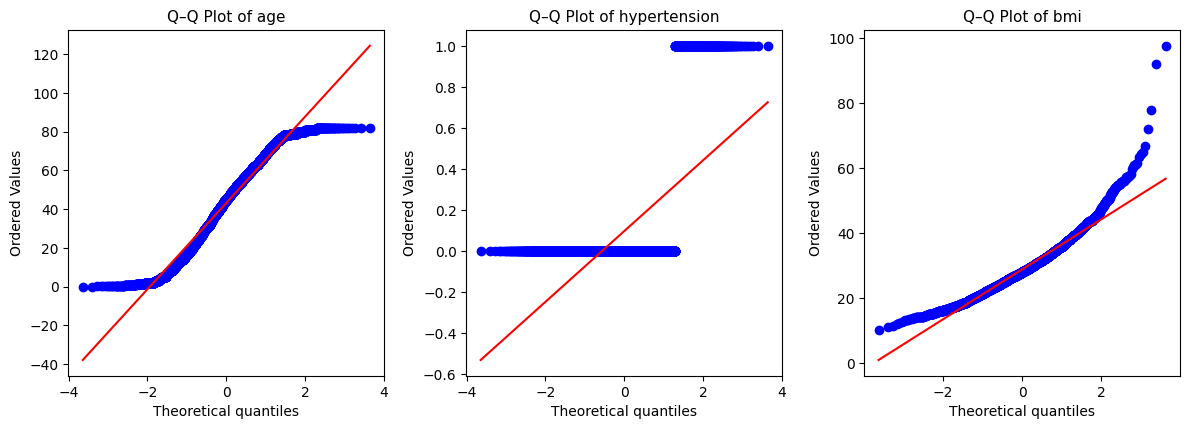

In [37]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(plot_cols, 1):
    plt.subplot(2, 3, i)
    stats.probplot(data[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q–Q Plot of {col}", fontsize=11)

plt.tight_layout()
plt.show()


C:\Users\NAIM\AppData\Local\Temp\ipykernel_15012\548899162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')
C:\Users\NAIM\AppData\Local\Temp\ipykernel_15012\548899162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')
C:\Users\NAIM\AppData\Local\Temp\ipykernel_15012\548899162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='pastel')
C:\Users\NAIM\AppData\Local\Temp\ipykernel_15012\548899162.py:5: FutureWarning: 

Passing `palette` without assigni

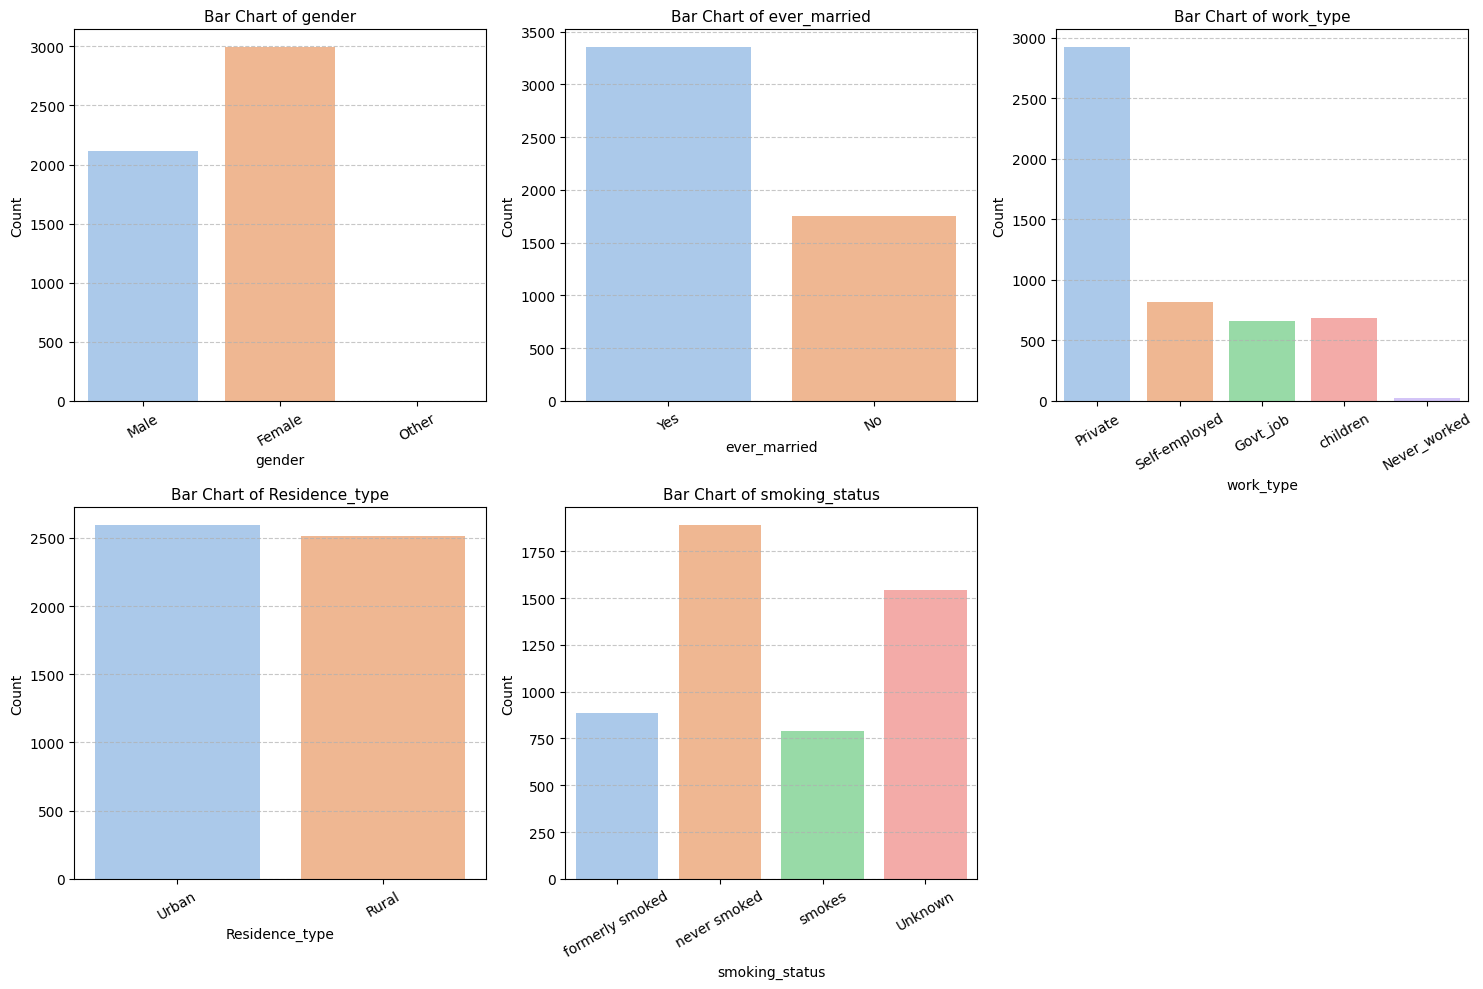

In [40]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=data[col], palette='pastel')
    plt.title(f'Bar Chart of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [42]:
num_df = data[numeric_cols].replace([np.inf, -np.inf], np.nan).dropna()
sample1 = num_df.iloc[0].to_numpy()
sample2 = num_df.iloc[1].to_numpy()
euclidean_distance = euclidean(sample1, sample2)
euclidean_distance

123.52442228158769

In [44]:
manhattan_distance = cityblock(sample1, sample2)
manhattan_distance

np.float64(139.86999999999998)

In [45]:
cos_sim = 1 - cosine(sample1, sample2)
cos_sim

np.float64(0.933969853526742)

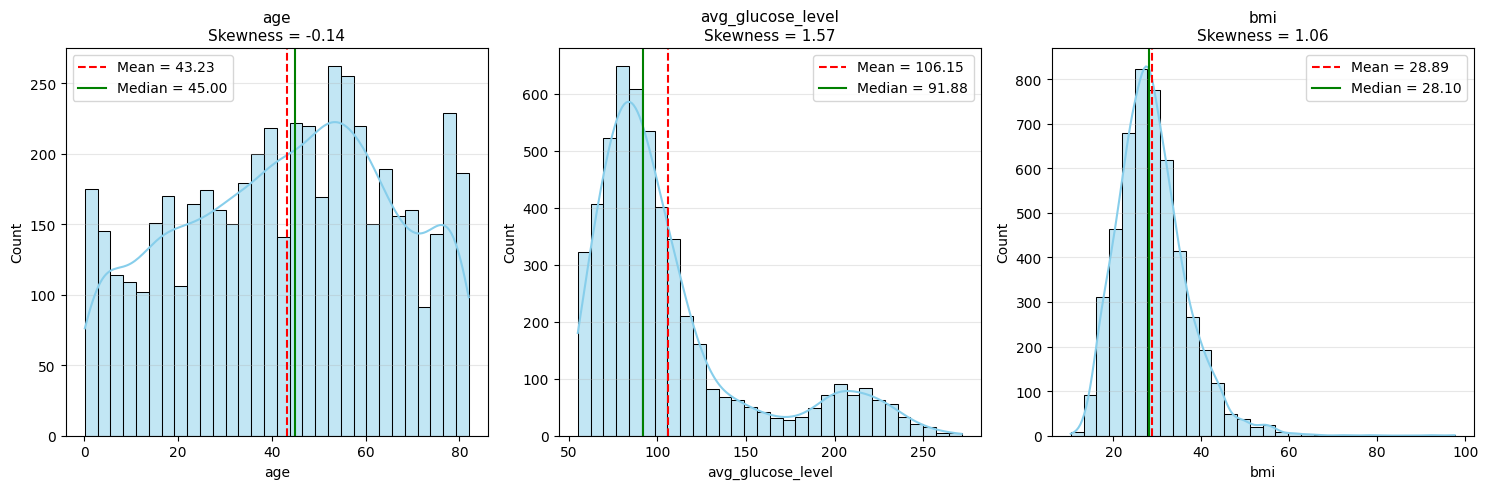

In [46]:
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    
    sns.histplot(data[col].dropna(), kde=True, color='skyblue', bins=30)
    
    skew_value = skew(data[col].dropna())
    
    plt.axvline(data[col].mean(), color='red', linestyle='--', label=f"Mean = {data[col].mean():.2f}")
    plt.axvline(data[col].median(), color='green', linestyle='-', label=f"Median = {data[col].median():.2f}")
    
    plt.title(f"{col}\nSkewness = {skew_value:.2f}", fontsize=11)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [47]:
# Drop 'id' column if it exists
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)

missing_info = data.isna().sum()
missing_info = missing_info[missing_info > 0]

if len(missing_info) == 0:
    print("No missing values found!")
else:
    print("Columns with missing values:\n")
    print(missing_info)

    for col in missing_info.index:
        if data[col].dtype in ['float64', 'int64']:
            median_val = data[col].median()
            data[col].fillna(median_val, inplace=True)
            print(f"Filled missing numeric values in '{col}' with median ({median_val:.2f})")
        else:
            mode_val = data[col].mode()[0]
            data[col].fillna(mode_val, inplace=True)
            print(f"Filled missing categorical values in '{col}' with mode ('{mode_val}')")

print("\n All missing values handled.")

Columns with missing values:

bmi    201
dtype: int64
Filled missing numeric values in 'bmi' with median (28.10)

 All missing values handled.


C:\Users\NAIM\AppData\Local\Temp\ipykernel_15012\1947243642.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)


In [48]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [49]:
# Select numeric columns to check for outliers
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

print(" Detecting and fixing outliers using the IQR method (Capping):\n")

for col in numeric_cols:
    # Calculate quartiles and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper acceptable bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before fixing
    n_before = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    # Apply capping (Winsorizing)
    data[col] = np.where(data[col] < lower_bound, lower_bound,
                         np.where(data[col] > upper_bound, upper_bound, data[col]))
    # Count outliers after fixing
    n_after = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

    print(f"Column '{col}': {n_before} outliers found → after capping: {n_after}")
    print(f"    Allowed range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print("-" * 60)

print("\n All numeric outliers have been capped using the IQR method.")

 Detecting and fixing outliers using the IQR method (Capping):

Column 'age': 0 outliers found → after capping: 0
    Allowed range: [-29.00, 115.00]
------------------------------------------------------------
Column 'avg_glucose_level': 627 outliers found → after capping: 0
    Allowed range: [21.98, 169.36]
------------------------------------------------------------
Column 'bmi': 126 outliers found → after capping: 0
    Allowed range: [10.30, 46.30]
------------------------------------------------------------

 All numeric outliers have been capped using the IQR method.


In [50]:
target_col = 'stroke'

# Numeric features (for scaling later)
numeric_features = ['age', 'avg_glucose_level', 'bmi']

# Binary numeric features
binary_numeric = ['hypertension', 'heart_disease']

# Categorical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

print("Numeric features:", numeric_features)
print("Binary numeric:", binary_numeric)
print("Categorical features:", categorical_features)

Numeric features: ['age', 'avg_glucose_level', 'bmi']
Binary numeric: ['hypertension', 'heart_disease']
Categorical features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [51]:
# Separate features and target
X = data.drop(columns=[target_col])
y = data[target_col]

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print("Shape before encoding:", X.shape)
print("Shape after encoding:", X_encoded.shape)
X_encoded.head()

Shape before encoding: (5110, 10)
Shape after encoding: (5110, 16)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,169.3575,36.6,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,169.3575,28.1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.9200,32.5,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,169.3575,34.4,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,169.3575,24.0,False,False,True,False,False,True,False,False,False,True,False


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # because the target is imbalanced (few stroke cases)
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("\nStroke rate in full data:", y.mean())
print("Stroke rate in train:", y_train.mean())
print("Stroke rate in test:", y_test.mean())

Train shape: (4088, 16) (4088,)
Test shape: (1022, 16) (1022,)

Stroke rate in full data: 0.0487279843444227
Stroke rate in train: 0.04867906066536203
Stroke rate in test: 0.04892367906066536


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Make copies to avoid SettingWithCopyWarning (optional but cleaner)
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

# Scale only continuous numeric features
X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])
X_test_scaled[numeric_features]  = scaler.transform(X_test_scaled[numeric_features])

print("Scaling done on columns:", numeric_features)
X_train_scaled.head()

Scaling done on columns: ['age', 'avg_glucose_level', 'bmi']


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
845,0.205661,0,0,-0.960948,0.615716,False,False,True,False,True,False,False,True,False,True,False
3744,-1.254901,0,0,0.633947,-1.079822,True,False,False,False,True,False,False,False,False,True,False
4183,1.046590,0,0,0.278223,-0.533326,False,False,True,False,False,True,False,False,False,True,False
3409,0.028623,0,0,-1.075213,-0.547339,True,False,True,False,True,False,False,True,False,False,True
284,-1.299160,0,0,-0.566133,0.405525,True,False,False,False,False,False,False,True,False,False,False


In [59]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators = 2000)
rf_model.fit(X_train, y_train)

,n_estimators,2000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9500978473581213

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [65]:
y_pred = Decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9080234833659491

In [66]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\NAIM\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [69]:
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9510763209393346

In [72]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [73]:
y_pred = xg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9422700587084148